# Decision Trees

## Entropy 
* **A measure of dataset's disorder** (how similar is the dataset)
* If the data are the same, **entropy is 0**
* The higher the entropy, the data have more varantions

 > It's possible to construct a flowchart to help you decide a classification for something with machine learning 

Decision Trees is another form of **superviser learning**.
It can look at different attributes, observe the threshold and yield result (e.g **we want to build a filter out resumes based on historical hiring data**)

### How Decision Trees Work?
* At each step, find the attribute we can use to partition the dataset to minimized the entrophy (e.g. **ID3**)
* It's a greedy algorithm, as it goes down the tree, it picks the decision that reduce entropy the most at that stage
   * **might not result in an optimal tree**
   
### Random Forests
* Decision trees are very susceptible to **overfitting**
* To avoid this, we can construct several alternate DT and have them vote on the final classification.
#### How?
    * Randomly re-sampke the input data for each tree (i.e. *bootstrap aggregating/bagging*)
    * Randomize a subset of the attributes each step is allowed to choose from 

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "./PastHires.csv"
df = pd.read_csv(input_file, header = 0)

In [2]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


**scikit-learn needs everything to be numerical for decision trees to work**. 
Mapper:
 * Y,N to 1,0 
 * levels of education to some scale of 0-2.

Note: *In the real world, you'd need to think about how to deal with unexpected or missing data! By using map(), we know we'll get NaN for unexpected values.*

In [3]:
#Mapping the data into numerical data:
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [5]:
#Separting the features from the target column
features = list(df.columns[:6])
print "Features", features

Features ['Years Experience', 'Employed?', 'Previous employers', 'Level of Education', 'Top-tier school', 'Interned']


In [6]:
#Build the decision tree
y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

> To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "no hires" and 5 "hires" by the tim we get to that point. value = [3. 0.] means 3 no-hires and 0 hires.

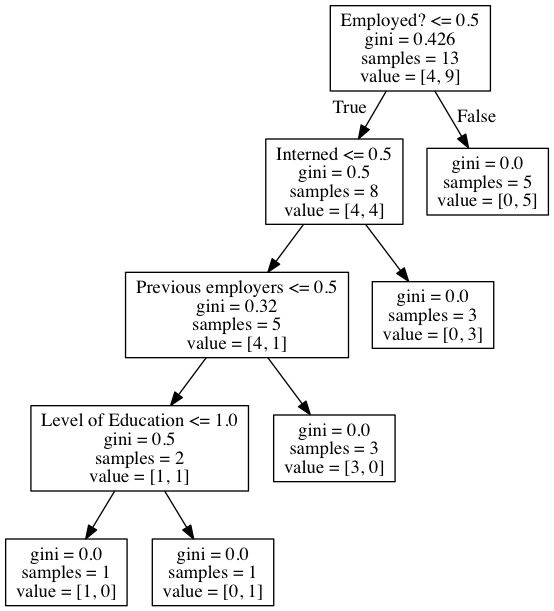

In [7]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

* gini = measures of entropy 
* value = [!Hired Hired]

## Ensemble learning: using a random forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#Predict employment of an employed 10-year veteran
print clf.predict([[10, 1, 4, 0, 0, 0]])
#...and an unemployed 10-year veteran
print clf.predict([[10, 0, 4, 0, 0, 0]])

[1]
[0]
